In [59]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_classification

## Wczytanie i przygotowanie obrazka

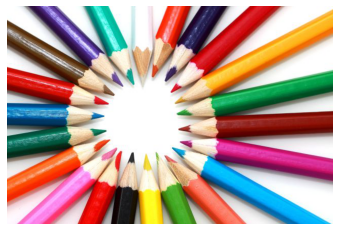

In [7]:
kredki = plt.imread('pencils.jpg', format='jpg')
plt.imshow(kredki)
plt.axis('off')
plt.show()

In [8]:
kredki.shape

(427, 640, 3)

In [47]:
# Spłaszczenie obrazu
kredki_flat = kredki.reshape(-1, 3)


## Wyznaczenie liczby klastrów metodą inercji

In [52]:
# Inercja - tworzenie wykresu osypiska
# Na tej podstaie podjąć będzie można decyzję, jaka wielkość klastrów jest optymalna dla omawianego przypadku

ks = range(2,20) #inercja wykonywana będzie, uwzględniając kolejno możliwą liczbę klastrów od 2 do 20
inercje = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=0).fit(kredki_flat)
    inercje.append(km.inertia_)

inercje_df = pd.DataFrame({'K':ks, 'Inercja' : inercje})

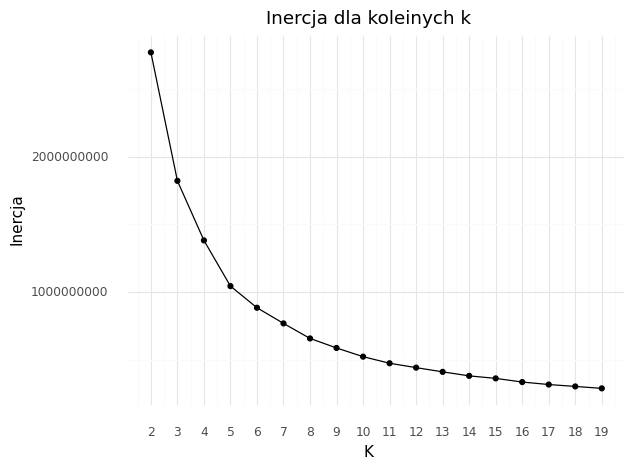

<ggplot: (166134185969)>

In [53]:
(ggplot(inercje_df, aes(x='K', y='Inercja'))+
 geom_point()+geom_line() +
 scale_x_continuous(breaks = ks)+
 theme_minimal()+
 labs(title = 'Inercja dla koleinych k'))

In [ ]:
# Na podstawie powyższego wykresu zauważyć można, że punkt przegięcia znajduje się w okolicy 10 klastra.

In [54]:
km = KMeans(n_clusters=10, random_state=0).fit(kredki_flat)
np.unique(km.labels_)
print(km.cluster_centers_)
kredki_flat

[[ 17.37826962 171.79227087 219.48782349]
 [142.92895249 123.928021   120.4262427 ]
 [247.90189898 246.32264622 244.5505365 ]
 [119.50164974  29.67292283  28.37279856]
 [230.15239682  80.17014868 123.88509357]
 [247.86889161 177.20437673  41.95152024]
 [220.37189979  36.33670146  17.27415449]
 [220.52743045 193.54432005 189.33255791]
 [ 30.10303736  45.0272377   55.64147478]
 [ 27.85769404 141.79795512  83.82419137]]


array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [216, 255, 252],
       [243, 255, 242],
       [255, 255, 236]], dtype=uint8)

(-0.5, 639.5, 426.5, -0.5)

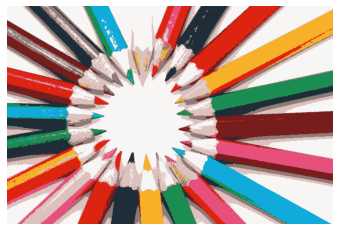

In [55]:
# Finalny obraz kredek w oparciu o wyniki inercji

kredki_flat_copy = kredki_flat.copy()
for i in np.unique(km.labels_):
    kredki_flat_copy[km.labels_ == i, :] = km.cluster_centers_[i]
    
kredki_fin = kredki_flat_copy.reshape(kredki.shape)
plt.imshow(kredki_fin)
plt.axis('off')

## Wyznaczenie liczby klastrów w oparciu o sylwetki

In [ ]:
# Sylwetki

ks2 = range(5,12) #inercja wykonywana będzie, uwzględniając kolejno możliwą liczbę klastrów od 5 do 12
sylwetki = []
df = pd.DataFrame(kredki_flat, columns = ['x1', 'x2', 'x3'])
df = df.drop_duplicates()


In [63]:
for k in ks2:
    km2 = KMeans(n_clusters=k, random_state=0).fit(kredki_flat)
    sylwetki.append(silhouette_score(df[['x1', 'x2', 'x3']], km2.predict(df[['x1', 'x2', 'x3']])))
    
sylwetki

[0.35928655573495266,
 0.3594493402361484,
 0.333911106368644,
 0.31799835359116235,
 0.3297087218252588,
 0.3173353667760215,
 0.3057471326380443]

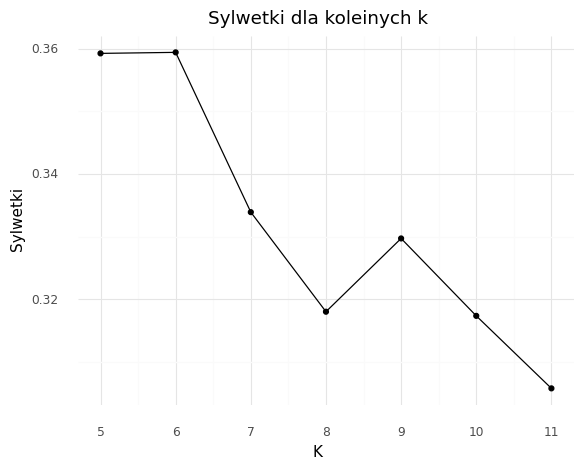

<ggplot: (166137514484)>

In [65]:
sylwetki_df = pd.DataFrame({'K': ks2, 'Sylwetki' : sylwetki})

(ggplot(sylwetki_df, aes(x='K', y='Sylwetki'))+
 geom_point()+geom_line() +
 scale_x_continuous(breaks = ks2)+
 theme_minimal()+
 labs(title = 'Sylwetki dla koleinych k'))

[[ 54.86599622  64.94148473  55.71406446]
 [243.15632387 236.7821686  235.10009318]
 [191.56090116 141.62689355 146.28964213]
 [ 19.63052098 164.24794836 183.87427386]
 [193.49936593  30.55485949  29.27576849]
 [248.07468057 162.62190352  45.54539765]]


(-0.5, 639.5, 426.5, -0.5)

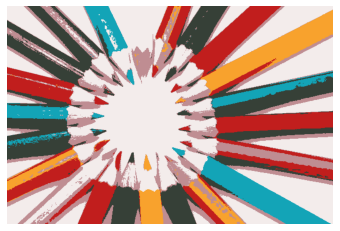

In [69]:
# Finalny obraz kredek w oparciu o wyniki sylwetek

km2 = KMeans(n_clusters=6, random_state=0).fit(kredki_flat)
np.unique(km2.labels_)
print(km2.cluster_centers_)
kredki_flat

kredki_flat_copy = kredki_flat.copy()
for i in np.unique(km2.labels_):
    kredki_flat_copy[km2.labels_ == i, :] = km2.cluster_centers_[i]
    
kredki_fin_sylwetki = kredki_flat_copy.reshape(kredki.shape)
plt.imshow(kredki_fin_sylwetki)
plt.axis('off')


## Porównanie wyników

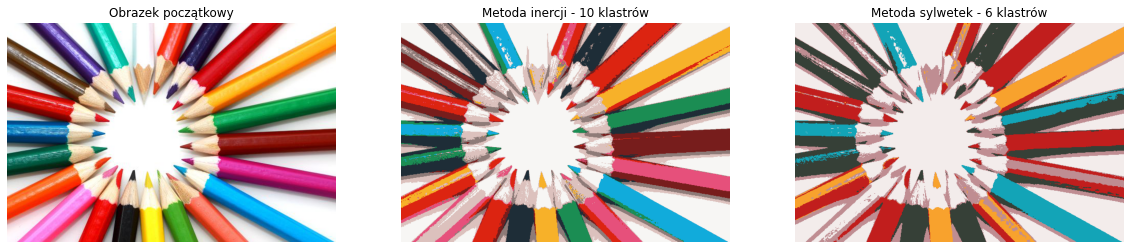

In [76]:
# Końcowe porównanie
fig = plt.figure(figsize=(20, 7))

fig.add_subplot(1, 3, 1)
plt.imshow(kredki)
plt.axis('off')
plt.title("Obrazek początkowy")

fig.add_subplot(1, 3, 2)
plt.imshow(kredki_fin)
plt.axis('off')
plt.title("Metoda inercji - 10 klastrów")

fig.add_subplot(1, 3, 3)
plt.imshow(kredki_fin_sylwetki)
plt.axis('off')
plt.title("Metoda sylwetek - 6 klastrów")

plt.show()